In [30]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
file_path = "data/example_2/example_2_many_treatments_with_separate_control_10pct_h1.csv"
df = pd.read_csv(file_path)
df

,group,VIP,ground_truth
0,Control 0,73.764327,0
1,Control 0,94.580078,0
2,Control 0,84.356416,0
3,Control 0,62.018164,0
4,Control 0,30.264387,0
...,...,...,...
199995,Treatment 999,76.023186,0
199996,Treatment 999,55.684785,0
199997,Treatment 999,100.714423,0
199998,Treatment 999,56.466698,0


In [32]:
p_values = []
for i in range(0,int(len(df['group'].unique())/2)):
    control = df[df['group']==f'Control {i}']
    treatment = df[df['group']==f'Treatment {i}']
    p_values.append(stats.ttest_ind(control['VIP'], treatment['VIP']).pvalue)
print(p_values)

[0.34199261288759186, 0.004342286985963723, 0.07180979945322392, 0.17644708308679088, 0.4922795106028195, 0.696185946334007, 0.40270747797133677, 0.24182184952750757, 0.8438447442771195, 0.977222025977997, 0.8744178398872574, 0.9287539215158622, 0.9764723961513437, 0.7384541328538865, 1.4306414688279572e-05, 0.415572519275337, 0.4116986699600851, 0.729452934153106, 0.6251632532131673, 0.09508026414018438, 0.6110537012274495, 0.5746485586184312, 0.9672175336952085, 0.5631349182354459, 0.8180203948918198, 0.9875108993225105, 0.7916208813232423, 0.5291317114867704, 0.08079027446320822, 0.5712397844696181, 0.025070349568844897, 0.3930316321094459, 0.24549838618421108, 0.4833517284454534, 0.7530640509362245, 0.36909186796087023, 0.6849672717140423, 0.10230973588192391, 0.5650459892696639, 0.3186006403692826, 0.5613872834330382, 0.39958096674106724, 0.3120189926513161, 0.07058117335127682, 0.9494069896477793, 0.7144307006317663, 0.34220247631393363, 0.08587922080448407, 0.0036918254808376923

<Axes: ylabel='Count'>

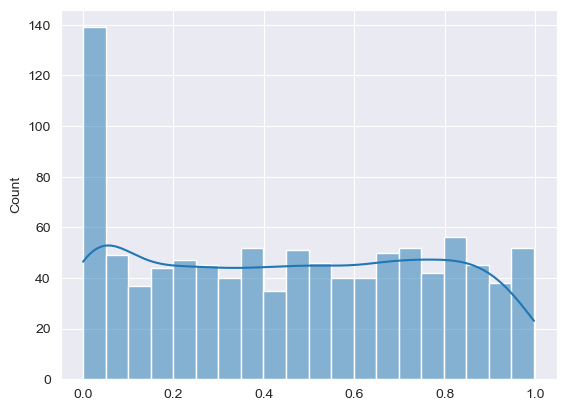

In [33]:
sns.histplot(p_values, kde=True,bins=20)

In [37]:
from statsmodels.stats.multitest import multipletests

reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(p_values, alpha=0.05, method='fdr_bh')

reject_imp = reject
print(reject)

[False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False  True False False
  True False False False  True  True False False Fa

In [38]:
#by hand

def fdr_bh(p_values, alpha=0.05):
    p_values = np.array(p_values)
    n = len(p_values)
    sorted_index = np.argsort(p_values)
    
    largest_index_to_reject = -1
    for i in range(n):
        
        if p_values[sorted_index[i]] <= alpha*(i+1)/n:
            largest_index_to_reject = i
        
    reject_index = sorted_index[:largest_index_to_reject+1]
    reject = np.zeros(n)
    reject[reject_index] = 1
    return reject

reject = fdr_bh(p_values)
print(reject)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [41]:
np.sum(reject != reject_imp)

0

In [50]:
ground_truth = []
for i in range(0,int(len(df['group'].unique())/2)):
    gt = np.mean(df[df['group']==f'Treatment {i}'].ground_truth)
    ground_truth.append(gt)
ground_truth = np.array(ground_truth)
print(ground_truth)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [57]:
type1_error = type1_error = np.sum((ground_truth == 0) & (reject == 1)) / np.sum(ground_truth == 0)
type2_error = np.sum((ground_truth != 0) & (reject == 0)) / np.sum(ground_truth != 0)
type1_error, type2_error

(0.0033333333333333335, 0.27)